In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
cancer=load_breast_cancer()
cancer.DESCR
print(type(cancer))
print(cancer.keys())
print(cancer['target_names'],cancer['filename'],cancer['feature_names'])


<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['malignant' 'benign'] C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\breast_cancer.csv ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
cancer_1=load_breast_cancer(return_X_y=True)
type(cancer_1)
cancer_1[0][:][1]

array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
       1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
       1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02])

In [43]:
data=np.c_[cancer.data , cancer.target]
df=pd.DataFrame(data,columns=np.append(cancer.feature_names,['target']))

In [44]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [48]:
len(df[df['target']==0]),len(df[df['target']==1])

(212, 357)

In [49]:
counts=df.target.value_counts(ascending=True)
counts.index="benign malignant".split()

In [51]:
type(counts)
counts

benign       212
malignant    357
Name: target, dtype: int64

In [64]:
X=df[df.columns[:-1]]
y=df.target[:]
type(X),type(y)
X.shape,len(y)

((569, 30), 569)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=426,test_size=143,random_state=0)
type(X_train)

pandas.core.frame.DataFrame

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [97]:
means=df.mean()[:-1].values.reshape(1,-1)
model.predict(means)
model.predict(X_test)
model.score(X_test,y_test)

0.916083916083916

<IPython.core.display.Javascript object>


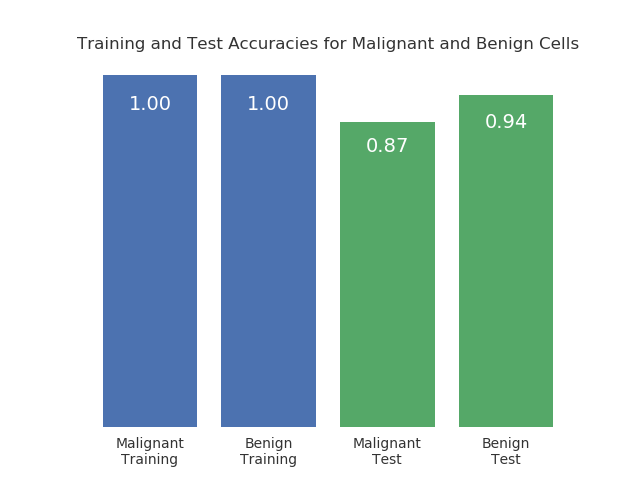

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

In [115]:
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores=[model.score(mal_train_X,mal_train_y), model.score(ben_train_X,ben_train_y), model.score(mal_test_X,mal_test_y),
       model.score(ben_test_X,ben_test_y)]
plt.figure()
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])
for bar in bars:
    height=bar.get_height()
    plt.gca().text(bar.get_x()+bar.get_width()/2,height*0.90,'{0:.{1}f}'.format(height,2),ha='center',color='w',fontsize=14)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<IPython.core.display.Javascript object>


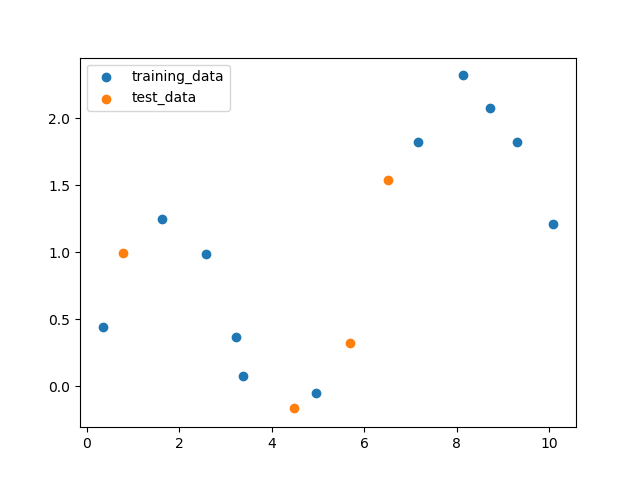

In [133]:
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)
plt.figure()
plt.scatter(X_train,y_train,label='training_data')
plt.scatter(X_test,y_test,label='test_data')
plt.legend()

In [186]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures   
from sklearn.metrics.regression import r2_score

(1, 100)
(100,)
(1, 100)
(100,)
(1, 100)
(100,)
(1, 100)
(100,)


<IPython.core.display.Javascript object>


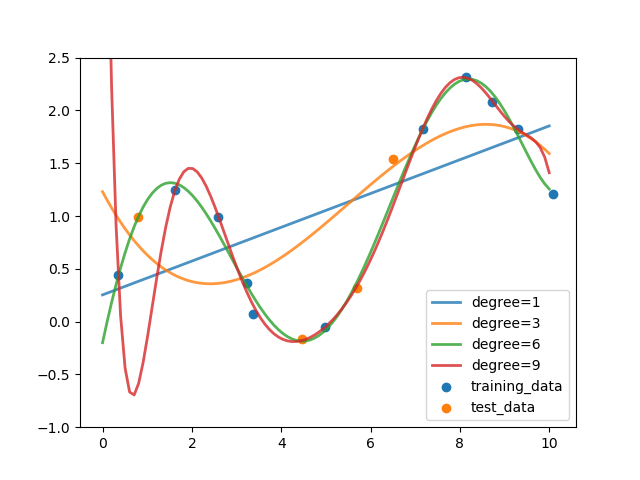

In [179]:
results = np.zeros([4,100])

X_predict = np.linspace(0,10,100).reshape(-1,1)

count = 0

for i in [1,3,6,9]:

    poly = PolynomialFeatures(degree=i)

    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))

    X_predict_poly = poly.fit_transform(X_predict)

    linreg = LinearRegression().fit(X_train_poly, y_train)

    tmp_ans = linreg.predict(X_predict_poly).reshape(1,-1)
    print(tmp_ans.shape)

    results[count,:] = tmp_ans
    print(results[count,:].shape)

    count = count + 1
#print(results[1])
plt.figure()
plt.scatter(X_train,y_train,label='training_data')
plt.scatter(X_test,y_test,label='test_data')
#for i in range(4):
    #plt.plot(np.linspace(0,10,100),results[i])
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), results[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1,2.5)
plt.legend(loc=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

<IPython.core.display.Javascript object>


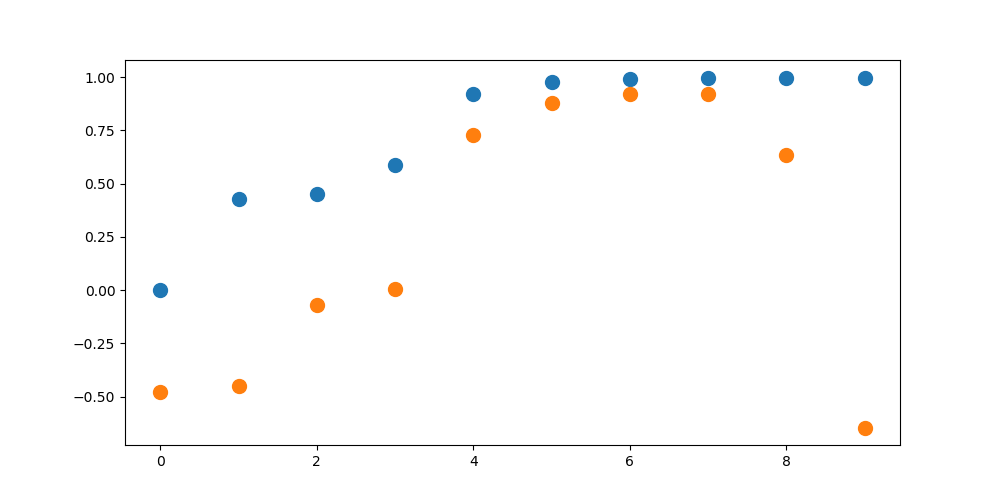

(-0.6452477727050785, 0.7770913978821574)

In [187]:
results_train=np.zeros([10,1])
results_test=np.zeros([10,1])

for i in range(0,10):
    poly=PolynomialFeatures(degree=i)
    X_train_poly=poly.fit_transform(X_train.reshape(-1,1))
    X_test_poly=poly.fit_transform(X_test.reshape(-1,1))
    linreg=LinearRegression().fit(X_train_poly,y_train)
    linlasso=Lasso(alpha=0.01,max_iter=10000).fit(X_train_poly,y_train)
    lin_reg_test_score=r2_score(y_test,linreg.predict(X_test_poly))
    lasso_reg_test_score=r2_score(y_test,linlasso.predict(X_test_poly))
    score_train=r2_score(y_train,linreg.predict(X_train_poly))
    score_test=r2_score(y_test,linreg.predict(X_test_poly))
    results_train[i]=score_train
    results_test[i]=score_test
    results_train=results_train.flatten()
    results_test=results_test.flatten()
results_train,results_test
plt.figure(figsize=(10,5))
plt.plot(range(0,10,1), results_train, 'o', label='training data', markersize=10)
plt.plot(range(0,10,1), results_test, 'o', label='test data', markersize=10)
lin_reg_test_score,lasso_reg_test_score

In [191]:
mush_df=pd.read_csv(r'C:\Users\vivek\Desktop\mushroom.csv')
mush_df2=pd.get_dummies(mush_df)
mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [214]:
from sklearn.tree import DecisionTreeClassifier
X=mush_df2.iloc[:,2:]
y=mush_df2.iloc[:,1]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
clf=DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
Series=pd.Series(data=clf.feature_importances_,index=X_train.columns.values)
print(type(Series))
Series.sort_values(axis=0,ascending=False).index.to_list()[:5]

<class 'pandas.core.series.Series'>


['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [215]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [225]:
clf=SVC(C=1.0,kernel='rbf').fit(X_train,y_train)
params_range=np.logspace(-4,1,6)
tarin_scores,test_scores=validation_curve(clf,X_train,y_train,param_range=params_range,param_name='gamma')
train_scores_mean=np.mean(tarin_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [227]:
train_scores_mean,test_scores_mean

(array([0.89069424, 0.97275562, 0.99753816, 1.        , 1.        ,
        1.        ]),
 array([0.88987363, 0.9704579 , 0.99622518, 1.        , 1.        ,
        0.51649434]))

In [228]:
from sklearn.datasets import make_classification,make_blobs,make_regression,make_friedman1

In [244]:
X_train,y_train=make_regression(n_samples=100,n_features=15,bias=150,random_state=0,noise=30)
X_train.shape,y_train.shape

((100, 15), (100,))

<IPython.core.display.Javascript object>


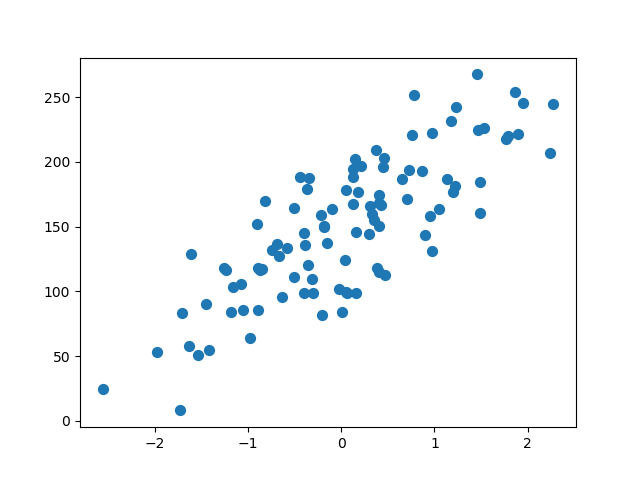

(100, 1) (100,)


In [249]:
plt.figure()
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
print(X_R1.shape,y_R1.shape)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)

#plt.scatter(X_train,y_train,cmap='viridas',alpha=0.6)

<IPython.core.display.Javascript object>


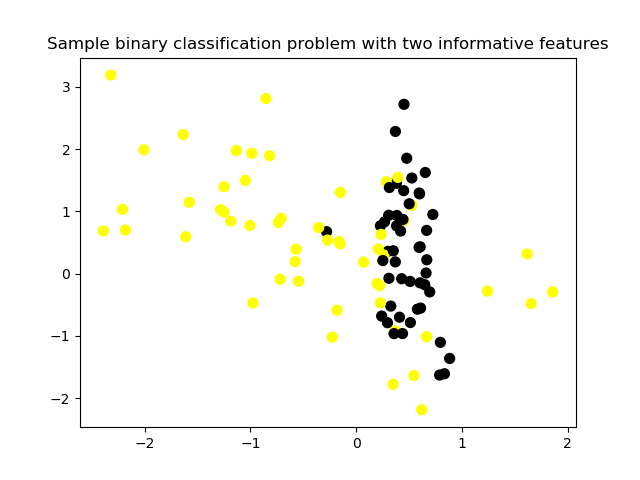

(array([ 0.37163989, -0.1617182 , -1.63650855,  0.62041909, -0.98718544,
        -0.14918509,  1.61878776, -2.0077599 ,  0.51055071,  0.41002859,
         0.52751248,  0.59985786,  0.45312252, -1.00514147,  0.47834537,
         0.29625824,  0.32783482,  0.60447379,  0.50205696,  0.60563412,
        -1.28273822,  0.30764063,  0.38097545,  0.35846584,  0.3016695 ,
         0.64998136, -0.15122279,  0.45000368,  0.2858526 ,  0.43895676,
        -0.27993003,  0.72574802,  0.44307878,  0.66156258,  0.54699455,
        -0.97609738, -0.70971021, -1.13281739,  0.66816014,  0.34910202,
        -1.61213297, -0.71815226, -0.22541636,  1.24261606,  0.26394877,
        -1.18765743,  0.83543292, -0.54491612, -2.32040545,  0.59536391,
         0.223168  ,  0.60970963,  0.45268095,  0.79670808,  0.57961675,
         0.22986176,  0.59665605,  0.24139141, -1.25179327,  0.38426577,
        -0.85324757,  0.52678775, -1.04860553, -2.21061298,  0.42077229,
        -1.57818714,  0.51341491, -0.35450433,  0.1

In [254]:

from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()
X_C2[:, 0], X_C2[:, 1],y_C2